In [55]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.applications.densenet import layers
from matplotlib import pyplot as plt

In [56]:
np.set_printoptions(precision=3, suppress=True)

In [57]:
diabetes_data = pd.read_csv(
    "../models/diabetes.csv",
    names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"], sep=',', header=0)
diabetes_features = diabetes_data.copy()
diabetes_labels = diabetes_features.pop('Outcome')

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [58]:
normalize = layers.Normalization()
normalize.adapt(diabetes_features)

model = tf.keras.Sequential([
    normalize,
    layers.Dense(64),
    layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [59]:
history = model.fit(diabetes_features, diabetes_labels, epochs=10, validation_split=0.2)
model.summary()

Epoch 1/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6318 - accuracy: 0.6612 - val_loss: 0.3486 - val_accuracy: 0.6623
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.6922 - val_loss: 0.1825 - val_accuracy: 0.7597
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.7427 - val_loss: 0.1584 - val_accuracy: 0.7727
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.7752 - val_loss: 0.1614 - val_accuracy: 0.7597
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.7671 - val_loss: 0.1594 - val_accuracy: 0.7792
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.7834 - val_loss: 0.1653 - val_accuracy: 0.7597
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.7801 - val_loss: 0.1592 - val_accuracy: 0.7727
Epoch 8/10
20/20 [==

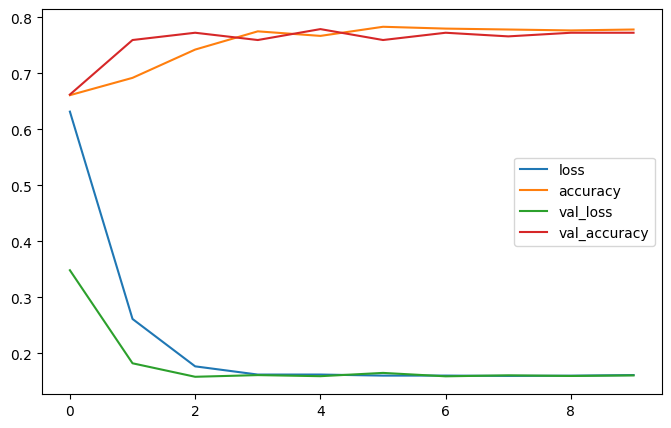

In [60]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()